In [32]:
import config
from bs4 import BeautifulSoup as BS
import requests
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
import time
import re
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

In [4]:
df_stats_total = pd.read_csv('df_stats_merged.csv', index_col='team')

In [59]:
df_stats_total4 = pd.read_csv('df_stats_merged4.csv', index_col='team')

In [100]:
df_stats_total6 = pd.read_csv('df_stats_merged6.csv', index_col='team')

In [3]:
df_stats_poss2 = pd.read_csv('df_stats_poss2.csv', index_col='Team')

In [6]:
df_stats_poss2.head()

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,5.911765,10.000000,2.088235,10.176471,571.000000,12.500000,12.794118,6.000000,9.323529,...,15.705882,64.029412,51.558824,1.411765,0.323529,0.176471,10.117647,0.088235,0.029412,0.622
Borussia Dortmund,13.470588,3.352941,6.882353,1.235294,11.441176,524.352941,12.941176,8.852941,4.352941,11.205882,...,13.970588,58.970588,52.441176,2.647059,0.088235,0.147059,18.470588,0.382353,0.029412,0.568
RasenBallsport Leipzig,18.117647,4.588235,8.470588,1.558824,11.764706,335.911765,9.264706,10.147059,4.470588,11.588235,...,22.500000,65.705882,61.941176,2.794118,0.500000,0.176471,19.647059,0.176471,0.088235,0.495
Bayer Leverkusen,18.882353,4.617647,8.970588,1.000000,11.764706,536.764706,9.970588,10.058824,5.735294,11.911765,...,16.882353,68.147059,55.441176,2.705882,0.441176,0.176471,18.882353,0.264706,0.000000,0.577
Borussia M.Gladbach,16.617647,4.117647,7.588235,1.352941,10.735294,436.617647,8.205882,8.411765,5.147059,8.941176,...,13.147059,56.970588,46.029412,3.382353,0.088235,0.088235,17.294118,0.117647,0.058824,0.523


In [5]:
df_stats_poss2 = df_stats_poss2.drop(df_stats_poss2.columns[0], axis=1)

In [7]:
df_leagues = pd.read_csv('df_stats_leagues.csv', index_col=0)

In [8]:
df_leagues.columns

Index(['league', 'team'], dtype='object')

In [25]:
df_leagues.shape

(98, 2)

In [26]:
df_leagues.head()

,league,team
0,Bundesliga,Bayern Munich
1,Bundesliga,Borussia Dortmund
4,Bundesliga,RasenBallsport Leipzig
2,Bundesliga,Bayer Leverkusen
8,Bundesliga,Borussia M.Gladbach


In [48]:
df_leagues['team']

0              Bayern Munich
1          Borussia Dortmund
4     RasenBallsport Leipzig
2           Bayer Leverkusen
8        Borussia M.Gladbach
               ...          
14         Parma Calcio 1913
15                     Genoa
10                    Empoli
18                 Frosinone
19                    Chievo
Name: team, Length: 98, dtype: object

In [60]:
df_stats_total4.head(10)

,INT,CR,ACR,CCOP,CCSP,BLK,TKL,FC,FS,P,...,SV,AKS,PKC,CL,PUNCH,ALB,ATB,LMT,TOFF,BCS
team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,336,777,201,340,71,61,464,312,346,19414,...,48,11,6,344,3,1292,31,1,88,52
Borussia Dortmund,385,458,114,234,42,79,497,292,389,17828,...,90,3,5,628,13,981,36,1,64,51
RasenBallsport Leipzig,420,616,156,288,53,70,653,465,400,11421,...,95,17,6,668,6,864,29,3,87,38
Bayer Leverkusen,364,642,157,305,34,99,598,370,400,18250,...,92,15,6,642,9,1197,23,0,66,44
Borussia M.Gladbach,310,565,140,258,46,102,500,332,365,14845,...,115,3,3,588,4,1067,19,2,70,30
Wolfsburg,430,681,176,226,48,95,540,358,445,12164,...,110,5,6,739,17,1449,16,4,67,37
Eintracht Frankfurt,380,686,155,210,55,103,612,432,353,9861,...,127,13,1,669,14,1094,20,1,84,45
Werder Bremen,407,676,164,274,39,109,552,437,350,13366,...,108,5,5,773,14,1086,14,2,40,30
Hoffenheim,400,666,179,364,56,104,574,471,355,13450,...,123,7,7,603,8,952,17,3,66,42


In [255]:
cos_sim = cosine_similarity(df_scaled2)

In [16]:
cos_sim[0:5]

array([[1.        , 0.99954729, 0.99007659, 0.99954669, 0.99935514,
        0.99361386, 0.98089331, 0.99699889, 0.99714505, 0.98976937,
        0.99300537, 0.98961308, 0.99151727, 0.98735055, 0.98884966,
        0.9881916 , 0.98945264, 0.98884191, 0.99946341, 0.99976695,
        0.999712  , 0.9991171 , 0.99901042, 0.9981412 , 0.9917409 ,
        0.99033584, 0.99232103, 0.99340268, 0.98953904, 0.98892853,
        0.97828392, 0.99325531, 0.9721837 , 0.98376295, 0.9846254 ,
        0.93363036, 0.99536037, 0.99004386, 0.99953034, 0.99470082,
        0.99960833, 0.9932247 , 0.99441545, 0.94401304, 0.99384273,
        0.98878014, 0.99390453, 0.9677279 , 0.99937248, 0.98371243,
        0.97873027, 0.98380154, 0.9938573 , 0.99574459, 0.98709789,
        0.9901829 , 0.97768196, 0.9876512 , 0.99944921, 0.99522472,
        0.99899556, 0.99590978, 0.99621265, 0.98969238, 0.9983326 ,
        0.9840163 , 0.98064704, 0.99389706, 0.99516992, 0.98865731,
        0.9914086 , 0.99325564, 0.98914177, 0.98

In [10]:
epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()

In [256]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_scaled2.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_scaled2.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(fr_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], fr_teams[0], sp_teams[0], ge_teams[0])
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[0], fr_teams[0], it_teams[0], ge_teams[0])
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(en_teams[0], fr_teams[0], it_teams[0], sp_teams[0])
    
    else:
        print('not applicable')
    
    return 


In [260]:
recommendations('Paris Saint Germain')

Chelsea Atalanta Barcelona Borussia Dortmund


In [261]:
for team in df_leagues['team']:
    print(team , recommendations(team), '++++++++')

Manchester City Lyon Atalanta Real Madrid
Bayern Munich None ++++++++
Chelsea Paris Saint Germain Atalanta Barcelona
Borussia Dortmund None ++++++++
Everton Marseille Atalanta Eibar
RasenBallsport Leipzig None ++++++++
Liverpool Lyon Atalanta Real Madrid
Bayer Leverkusen None ++++++++
Manchester United Paris Saint Germain Napoli Barcelona
Borussia M.Gladbach None ++++++++
Wolverhampton Wanderers Strasbourg Juventus Eibar
Wolfsburg None ++++++++
Everton Nantes Torino Eibar
Eintracht Frankfurt None ++++++++
Manchester City Saint-Etienne Roma Valencia
Werder Bremen None ++++++++
Manchester City Lyon Atalanta Real Madrid
Hoffenheim None ++++++++
Newcastle United Montpellier Udinese Leganes
Fortuna Duesseldorf None ++++++++
Brighton Caen Parma Calcio 1913 Villarreal
Hertha Berlin None ++++++++
Fulham Montpellier Lazio Valencia
Mainz 05 None ++++++++
Newcastle United Caen Udinese Espanyol
Freiburg None ++++++++
Everton Nantes Genoa Atletico Madrid
Schalke 04 None ++++++++
Brighton Dijon Chie

In [264]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_scaled2.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def opposites(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_scaled2.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(fr_teams[-1], it_teams[-1], sp_teams[-1], ge_teams[-1])
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], it_teams[-1], sp_teams[-1], ge_teams[-1])
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], fr_teams[-1], sp_teams[-1], ge_teams[-1])
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(en_teams[-1], fr_teams[-1], it_teams[-1], ge_teams[-1])
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(en_teams[-1], fr_teams[-1], it_teams[-1], sp_teams[-1])
    
    else:
        print('not applicable')
    
    return 

In [263]:
opposites('Liverpool')

['Guingamp', 'Reims', 'Dijon', 'Amiens', 'Caen'] ['Genoa', 'Udinese', 'Parma Calcio 1913', 'Frosinone', 'Chievo'] ['Leganes', 'Real Valladolid', 'SD Huesca', 'Alaves', 'Girona'] ['Fortuna Duesseldorf', 'Nuernberg', 'Freiburg', 'Augsburg', 'Hannover 96']


In [265]:
for team in df_leagues['team']:
    print(team , opposites(team), '++++++++')

Brighton Caen Chievo Alaves
Bayern Munich None ++++++++
Newcastle United Dijon Bologna Alaves
Borussia Dortmund None ++++++++
Fulham Strasbourg Udinese Espanyol
RasenBallsport Leipzig None ++++++++
Brighton Amiens Chievo Alaves
Bayer Leverkusen None ++++++++
Everton Nantes Torino Getafe
Borussia M.Gladbach None ++++++++
Crystal Palace Rennes Sampdoria Celta Vigo
Wolfsburg None ++++++++
Manchester United Nice Sassuolo Real Betis
Eintracht Frankfurt None ++++++++
West Ham Toulouse Bologna Celta Vigo
Werder Bremen None ++++++++
Huddersfield Caen Parma Calcio 1913 Girona
Hoffenheim None ++++++++
Manchester City Lyon Inter Real Betis
Fortuna Duesseldorf None ++++++++
Tottenham Saint-Etienne AC Milan Real Betis
Hertha Berlin None ++++++++
Arsenal Monaco Sampdoria Real Betis
Mainz 05 None ++++++++
Chelsea Paris Saint Germain Atalanta Sevilla
Freiburg None ++++++++
Manchester United Strasbourg Empoli Espanyol
Schalke 04 None ++++++++
Liverpool Paris Saint Germain AC Milan Real Betis
Augsburg N

In [94]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_total4.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def l_recommendations(team, cosine_sim = cos_sim):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    print(score_series)
    
    # populating the list with the titles of the best 10 matching movies
#     for i in all_indexes:
#         recommended_teams.append(list(df_stats_total4.index)[i])
    
#     if recommended_teams[0] in epl_array:
#         for i in recommended_teams:
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
            
#         print(fr_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in ligue_1_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], it_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in serie_a_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], fr_teams[0], sp_teams[0], ge_teams[0])
    
#     elif recommended_teams[0] in la_liga_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#             if i in bundesliga_array:
#                 ge_teams.append(i)
#         print(en_teams[0], fr_teams[0], it_teams[0], ge_teams[0])
        
#     elif recommended_teams[0] in bundesliga_array:
#         for i in recommended_teams:
#             if i in epl_array:
#                 en_teams.append(i)
#             if i in serie_a_array:
#                 it_teams.append(i)
#             if i in la_liga_array:
#                 sp_teams.append(i)
#             if i in ligue_1_array:
#                 fr_teams.append(i)
#         print(en_teams[0], fr_teams[0], it_teams[0], sp_teams[0])
    
#     else:
#         print('not applicable')
    
    return 

In [155]:
df_stats_poss2[df_stats_poss2['CR'] > 22]

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,5.911765,10.000000,2.088235,10.176471,571.000000,12.500000,12.794118,6.000000,9.323529,...,15.705882,64.029412,51.558824,1.411765,0.323529,0.176471,10.117647,0.088235,0.029412,0.622
Eibar,27.815789,7.000000,7.157895,2.000000,10.447368,310.052632,8.894737,9.289474,4.710526,10.210526,...,27.078947,67.789474,62.210526,2.184211,0.789474,0.105263,16.789474,0.315789,0.131579,0.520
Juventus,22.921053,5.657895,9.657895,1.657895,12.552632,455.868421,9.736842,9.631579,6.526316,8.526316,...,14.657895,57.000000,51.184211,2.210526,0.157895,0.105263,15.815789,0.315789,0.000000,0.549
Inter,28.710526,7.289474,10.631579,1.394737,13.078947,482.552632,7.526316,10.289474,6.394737,8.131579,...,14.184211,58.473684,50.184211,2.578947,0.184211,0.131579,15.184211,0.026316,0.000000,0.569
Roma,22.500000,6.342105,9.947368,1.763158,10.552632,372.657895,9.263158,10.710526,5.684211,9.236842,...,19.763158,58.473684,52.921053,3.105263,0.263158,0.184211,20.000000,0.157895,0.000000,0.510
SPAL 2013,22.736842,5.947368,7.026316,1.368421,14.684211,347.947368,7.210526,7.421053,4.736842,10.473684,...,15.710526,54.236842,52.000000,3.157895,0.131579,0.131579,21.052632,0.289474,0.052632,0.504


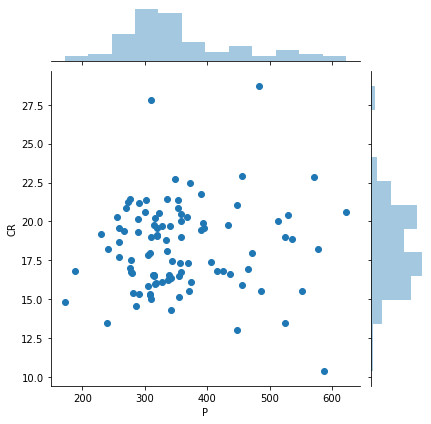

In [266]:
sns.jointplot(df_stats_poss2['P'], df_stats_poss2['CR'])

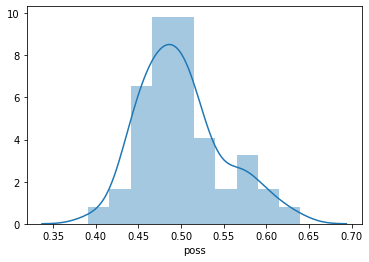

In [156]:
sns.distplot(df_stats_poss2['poss'], bins=10)

In [157]:
# Lyon Sampdoria Real Betis Borussia M.Gladbach
# Arsenal None ++++++++

In [163]:
df_stats_poss2[(df_stats_poss2.index == 'Arsenal') |
               (df_stats_poss2.index == 'Lyon') |
               (df_stats_poss2.index == 'Sampdoria') |
               (df_stats_poss2.index == 'Real Betis') |
               (df_stats_poss2.index == 'Borussia M.Gladbach')]

,CR,ACR,CCOP,CCSP,FS,P,DR,IBS,OBS,DSP,...,AW,BR,DW,SV,AKS,PKC,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Borussia M.Gladbach,16.617647,4.117647,7.588235,1.352941,10.735294,436.617647,8.205882,8.411765,5.147059,8.941176,...,13.147059,56.970588,46.029412,3.382353,0.088235,0.088235,17.294118,0.117647,0.058824,0.523
Arsenal,15.921053,3.315789,7.473684,0.710526,12.105263,456.078947,7.921053,8.315789,4.078947,10.789474,...,14.868421,60.421053,50.552632,3.500000,0.394737,0.184211,20.078947,0.473684,0.052632,0.561
Real Betis,15.526316,3.421053,6.736842,1.052632,14.605263,486.921053,11.473684,6.868421,4.815789,10.315789,...,12.657895,54.368421,54.289474,2.710526,0.447368,0.131579,16.868421,0.263158,0.157895,0.594
Lyon,17.947368,5.236842,10.052632,1.526316,12.605263,471.526316,12.026316,10.815789,6.894737,12.157895,...,16.684211,59.447368,57.368421,2.763158,0.289474,0.131579,16.184211,0.210526,0.078947,0.582
Sampdoria,16.789474,3.657895,7.078947,0.763158,13.736842,425.447368,7.289474,6.921053,5.894737,12.157895,...,13.000000,60.236842,50.105263,2.605263,0.526316,0.210526,19.894737,0.342105,0.026316,0.537


In [17]:
df_stats_poss2.columns

Index(['CR', 'ACR', 'CCOP', 'CCSP', 'FS', 'P', 'DR', 'IBS', 'OBS', 'DSP', 'PK',
       'FKCR', 'CRN', 'FKS', 'ALB', 'ATB', 'TOFF', 'BCS', 'INT', 'BLK', 'TKL',
       'FC', 'AW', 'BR', 'DW', 'SV', 'AKS', 'PKC', 'CL', 'PUNCH', 'LMT',
       'poss'],
      dtype='object')

In [18]:
cols_2_drop11 = ['ACR', 'FS', 'DSP', 'PK', 'FKCR', 'FKS', 'ALB', 'ATB', 'TOFF', 'BCS', 'SV', 'PKC', 'PUNCH']

In [19]:
df_stats_poss3 = df_stats_poss2.drop(columns=cols_2_drop11)

In [20]:
df_stats_poss3.head()

,CR,CCOP,CCSP,P,DR,IBS,OBS,CRN,INT,BLK,TKL,FC,AW,BR,DW,AKS,CL,LMT,poss
Team,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,10.000000,2.088235,571.000000,12.500000,12.794118,6.000000,8.441176,9.882353,1.794118,13.647059,9.176471,15.705882,64.029412,51.558824,0.323529,10.117647,0.029412,0.622
Borussia Dortmund,13.470588,6.882353,1.235294,524.352941,12.941176,8.852941,4.352941,4.941176,11.323529,2.323529,14.617647,8.588235,13.970588,58.970588,52.441176,0.088235,18.470588,0.029412,0.568
RasenBallsport Leipzig,18.117647,8.470588,1.558824,335.911765,9.264706,10.147059,4.470588,5.588235,12.352941,2.058824,19.205882,13.676471,22.500000,65.705882,61.941176,0.500000,19.647059,0.088235,0.495
Bayer Leverkusen,18.882353,8.970588,1.000000,536.764706,9.970588,10.058824,5.735294,5.588235,10.705882,2.911765,17.588235,10.882353,16.882353,68.147059,55.441176,0.441176,18.882353,0.000000,0.577
Borussia M.Gladbach,16.617647,7.588235,1.352941,436.617647,8.205882,8.411765,5.147059,5.558824,9.117647,3.000000,14.705882,9.764706,13.147059,56.970588,46.029412,0.088235,17.294118,0.058824,0.523


In [21]:
cos_sim1 = cosine_similarity(df_stats_poss3)

In [289]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_poss3.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations2(team, cosine_sim = cos_sim1):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_stats_poss3.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"Italy: {it_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}" )
        print(f"Spain: {sp_teams[0]}")
    
    else:
        print('not applicable')
    
    return 


In [291]:
recommendations2('Mainz 05')

England: Everton
France: Montpellier
Italy: Fiorentina
Spain: Girona


In [297]:
for team in df_leagues['team']:
    print(f"the recommendations for {team} are ", recommendations(team))

Manchester City Lyon Atalanta Real Madrid
the recommendations for Bayern Munich are  None
Chelsea Paris Saint Germain Atalanta Barcelona
the recommendations for Borussia Dortmund are  None
Everton Marseille Atalanta Eibar
the recommendations for RasenBallsport Leipzig are  None
Liverpool Lyon Atalanta Real Madrid
the recommendations for Bayer Leverkusen are  None
Manchester United Paris Saint Germain Napoli Barcelona
the recommendations for Borussia M.Gladbach are  None
Wolverhampton Wanderers Strasbourg Juventus Eibar
the recommendations for Wolfsburg are  None
Everton Nantes Torino Eibar
the recommendations for Eintracht Frankfurt are  None
Manchester City Saint-Etienne Roma Valencia
the recommendations for Werder Bremen are  None
Manchester City Lyon Atalanta Real Madrid
the recommendations for Hoffenheim are  None
Newcastle United Montpellier Udinese Leganes
the recommendations for Fortuna Duesseldorf are  None
Brighton Caen Parma Calcio 1913 Villarreal
the recommendations for Hert

In [181]:
df_scaled = pd.read_csv('df_scaled.csv', index_col=0)

In [208]:
df_scaled2.head()

,ppda_coef,deep,S,CR,CCOP,CCSP,P,DR,IBS,OBS,...,TKL,FC,AW,BR,DW,AKS,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,-0.898850,2.973806,2.775593,1.611378,1.795907,2.673514,2.370940,2.120765,3.188202,0.987291,...,-2.081226,-1.795271,-0.716088,1.360479,-0.948188,0.407311,-3.083852,-1.680898,-0.596272,2.474804
Borussia Dortmund,1.390868,0.807589,0.118582,-1.716195,-0.305416,-0.128590,1.854117,2.366656,0.630185,-0.790167,...,-1.469764,-2.115407,-1.202503,-0.403610,-0.713429,-1.157638,-0.662533,0.096810,-0.596272,1.379674
RasenBallsport Leipzig,-0.117029,0.509248,0.807436,-0.068055,0.765069,0.934277,-0.233706,0.317571,1.470131,-0.663206,...,1.420784,0.653768,1.188352,1.945090,1.814138,1.581023,-0.321502,-1.147586,0.708380,-0.100780
Bayer Leverkusen,-0.271538,1.067016,1.341650,0.203158,1.102074,-0.901585,1.991632,0.710995,1.412862,0.701628,...,0.401681,-0.866877,-0.386314,2.796366,0.084750,1.189786,-0.543172,-0.614273,-1.248599,1.562196
Borussia M.Gladbach,2.184874,0.405477,0.273222,-0.600050,0.170355,0.257907,0.882059,-0.272566,0.343840,0.066822,...,-1.414177,-1.475135,-1.433344,-1.101041,-2.419341,-1.157638,-1.003564,-1.503127,0.056054,0.467065


In [204]:
pca = PCA(n_components=30)
data = df_scaled2

In [209]:
transformed = pca.fit_transform(data)

In [210]:
transformed

array([[ 1.20794314e+01,  2.84509733e+00, -1.16097062e+00, ...,
         2.59660375e-01,  4.18875634e-01,  7.26182755e-02],
       [ 3.54954640e+00, -2.31420763e+00,  1.96798837e+00, ...,
        -1.67535875e-01, -1.48187314e-01, -1.41017320e-01],
       [ 1.62239512e+00,  3.87523041e+00,  2.14717559e+00, ...,
         2.12891541e-01, -9.28595445e-03,  1.67313759e-01],
       ...,
       [ 4.41099503e-01, -4.06640224e+00,  9.25675645e-02, ...,
         1.43476879e-03, -7.07623456e-03, -6.89583548e-02],
       [-3.39873180e+00, -1.96289217e+00, -1.94905899e+00, ...,
         1.79394392e-03,  1.08026466e-01,  2.35423651e-02],
       [-4.60946950e+00, -2.27147729e+00, -8.82582352e-01, ...,
        -1.91838638e-01, -1.55568254e-02, -6.90231676e-02]])

In [211]:
print(pca.explained_variance_ratio_)

[0.37252613 0.1181768  0.0705448  0.06612532 0.05143786 0.04384649
 0.03748292 0.03245292 0.02733142 0.02607755 0.02195427 0.01584278
 0.01449798 0.01441141 0.01296758 0.01047968 0.01004415 0.00941705
 0.00734968 0.00635253 0.00559882 0.00529968 0.00413202 0.00358431
 0.00340674 0.00287545 0.00230264 0.00185232 0.00056914 0.00051674]


In [212]:
print(pca.singular_values_)

[34.70950161 19.54952124 15.10436663 14.62358643 12.89767562 11.90796215
 11.00998492 10.24464495  9.40158586  9.1833976   8.42615685  7.15790056
  6.84736962  6.82689485  6.47589077  5.8216215   5.69936737  5.51858115
  4.87533125  4.53255654  4.25518336  4.139946    3.65553762  3.40465165
  3.31924536  3.04945867  2.72887402  2.44752751  1.3566813   1.29272384]


In [271]:
transformed[:,1]

array([ 2.84509733, -2.31420763,  3.87523041,  0.94739006, -3.24190828,
        0.65936969,  3.71664371, -0.15145361,  0.57696448, -0.0159477 ,
       -0.86774788, -0.20961578, -1.61147867,  3.27339366,  0.39810639,
        0.56984794, -1.05013769, -2.10666541, -0.94800515, -0.37039194,
       -1.18688386, -0.88089939, -2.70096938, -2.40877526,  0.40822105,
        4.42164692, -0.84179719,  1.48491424,  0.19607967, -0.58868718,
       -0.12341106, -3.18322931, -1.15132293,  0.29377126, -0.90529113,
        0.53770618, -2.35703186,  1.3423504 , -3.977266  ,  1.21218797,
        0.70719589, -0.69883625, -0.31295013,  2.05203261, -2.69167705,
        2.52991637,  0.33130068,  1.14413022, -1.88910687,  7.30692663,
        1.2811504 , -1.7687399 , -1.67360414, -0.82402623,  0.34158018,
        0.17505017,  1.26661812,  1.24256867, -1.88157154, -0.34855354,
        0.50515219,  0.87986164,  3.60024567,  2.76722784, -1.1236618 ,
        0.80453256,  2.67454521, -0.13238061, -0.84313805,  3.54

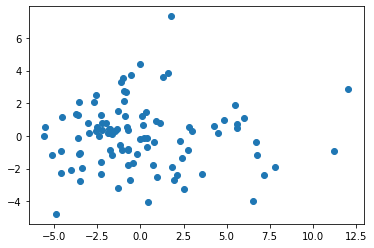

In [213]:
plt.scatter(transformed[:,0], transformed[:,1]);

In [214]:
pca.components_

array([[-1.37021369e-01,  2.53099569e-01,  2.50465101e-01,
         6.97637641e-02,  2.38891031e-01,  2.47774934e-02,
         2.57458333e-01,  1.78500370e-01,  2.50366647e-01,
         1.52147321e-01,  2.60420108e-01, -7.96046888e-02,
         2.43479418e-01,  1.73633818e-01,  1.10793402e-01,
         5.57726435e-02,  1.98463848e-01,  7.82711513e-02,
         2.20093961e-01,  2.31044961e-01, -1.89146648e-01,
        -1.38154934e-01, -1.54980144e-01, -9.73282480e-02,
        -1.22659327e-01, -1.68203456e-01,  5.46260729e-02,
        -1.18305833e-01,  1.60261876e-02, -2.30177709e-01,
        -9.67736671e-02, -5.31002866e-02,  2.59803420e-01],
       [-1.77025980e-01, -6.80470482e-02,  7.28199837e-02,
         2.89835975e-01,  1.23481477e-02,  3.46963283e-01,
        -1.11257272e-01,  9.87942274e-03,  1.03517314e-01,
        -1.12475258e-02,  4.55286388e-02,  3.27964621e-01,
         9.53966596e-02,  1.80760121e-01, -2.99906883e-02,
         9.64848642e-02, -1.03760667e-01, -2.89505742e-

In [215]:
pca.mean_

array([ 2.97381167e-16,  3.50060117e-16, -7.15980563e-16, -5.61625576e-16,
       -1.09776134e-15, -4.06704149e-16, -1.34812796e-16, -4.93935958e-16,
       -6.97854473e-16,  1.32603679e-15, -6.97854473e-16, -1.52938886e-15,
       -2.26576127e-16, -1.22351109e-16,  2.54898143e-16,  3.57423841e-16,
       -4.84872913e-16, -8.35499470e-17,  3.01346250e-16,  1.64550913e-16,
        6.18552828e-16, -1.05131323e-15, -1.99386992e-16,  1.90890387e-15,
       -2.78688637e-16, -5.35852541e-16,  1.17593010e-15, -6.87658547e-16,
       -7.70358833e-17,  2.85485921e-16,  8.32667268e-17,  4.06704149e-16,
        3.69319088e-16])

In [216]:
pca.get_covariance() 

array([[ 1.0102689 , -0.36482405, -0.38090256, ...,  0.23134931,
        -0.0272413 , -0.57167108],
       [-0.36482405,  1.00981836,  0.74360346, ..., -0.26840583,
        -0.13012985,  0.77993928],
       [-0.38090256,  0.74360346,  1.01362712, ..., -0.22374928,
        -0.23734158,  0.70406989],
       ...,
       [ 0.23134931, -0.26840583, -0.22374928, ...,  1.0103079 ,
        -0.06942547, -0.32778915],
       [-0.0272413 , -0.13012985, -0.23734158, ..., -0.06942547,
         1.01030627, -0.14261011],
       [-0.57167108,  0.77993928,  0.70406989, ..., -0.32778915,
        -0.14261011,  1.00863415]])

In [85]:
df_pca = pd.DataFrame(data = transformed, index = df_scaled.index, columns = df_scaled.columns)

ValueError: Shape of passed values is (98, 30), indices imply (98, 75)

In [60]:
df_pca.head()

,xG,npxG,ppda_coef,deep,G,A,AOP,ASP,S,SOG,...,OBSV,AKS,PKC,PKF,PKSV,CL,ECL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,17.707501,2.299785,-4.160416,-0.226125,0.219146,-1.123547,0.424808,-1.676861,3.443035,0.864963,...,0.000002,0.000578,0.000615,-0.004219,2.652279e-16,-2.868343e-16,2.828384e-16,-7.735784e-16,4.439040e-16,3.028012e-16
Borussia Dortmund,7.113854,-3.538504,1.903248,-2.610587,0.157484,0.202333,-0.403019,-1.138047,2.620691,3.491337,...,0.007006,0.004054,0.000705,-0.003459,4.993779e-16,-6.726011e-16,2.823641e-16,5.550646e-16,8.300468e-16,2.634827e-16
RasenBallsport Leipzig,4.749810,2.192070,0.178452,-4.259053,1.489670,-1.372841,-0.309159,-0.146701,-2.055781,-0.668068,...,0.001699,-0.012231,-0.002507,0.000573,3.406233e-16,2.508274e-16,-1.135550e-16,-9.502899e-17,7.981534e-16,-1.607544e-16
Bayer Leverkusen,7.398632,-0.818004,-0.167547,-0.971495,2.328940,0.799063,-2.448867,-0.295838,-0.023522,-0.960408,...,-0.010039,-0.003547,0.000625,0.001959,1.823016e-16,4.281290e-16,6.973254e-16,4.177970e-16,-4.581170e-16,1.273679e-15
Borussia M.Gladbach,3.229938,-3.727765,-1.617028,1.680398,-1.940659,0.330544,2.722692,-1.041985,1.594908,0.890639,...,-0.001908,0.004653,0.001682,0.002755,4.685842e-17,4.074326e-16,6.447610e-16,-8.646598e-16,-4.774763e-16,2.469128e-16


In [217]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[12.42009796  3.94003898  2.35197826  2.20463175  1.71494883  1.46185116
  1.24968833  1.08198711  0.91123522  0.86943084  0.73195999  0.52820145
  0.48336568  0.48047931  0.43234187  0.34939461  0.33487411  0.31396637
  0.24503974  0.21179452  0.18666583  0.1766923   0.13776243  0.11950158
  0.11358134  0.09586802  0.07677065  0.06175661  0.01897509  0.0172282 ]
[[-1.37021369e-01  2.53099569e-01  2.50465101e-01  6.97637641e-02
   2.38891031e-01  2.47774934e-02  2.57458333e-01  1.78500370e-01
   2.50366647e-01  1.52147321e-01  2.60420108e-01 -7.96046888e-02
   2.43479418e-01  1.73633818e-01  1.10793402e-01  5.57726435e-02
   1.98463848e-01  7.82711513e-02  2.20093961e-01  2.31044961e-01
  -1.89146648e-01 -1.38154934e-01 -1.54980144e-01 -9.73282480e-02
  -1.22659327e-01 -1.68203456e-01  5.46260729e-02 -1.18305833e-01
   1.60261876e-02 -2.30177709e-01 -9.67736671e-02 -5.31002866e-02
   2.59803420e-01]
 [-1.77025980e-01 -6.80470482e-02  7.28199837e-02  2.89835975e-01
   1.23481477e-02  3.

In [218]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [219]:
print(pc1)

[-0.13702137  0.25309957  0.2504651   0.06976376  0.23889103  0.02477749
  0.25745833  0.17850037  0.25036665  0.15214732  0.26042011 -0.07960469
  0.24347942  0.17363382  0.1107934   0.05577264  0.19846385  0.07827115
  0.22009396  0.23104496 -0.18914665 -0.13815493 -0.15498014 -0.09732825
 -0.12265933 -0.16820346  0.05462607 -0.11830583  0.01602619 -0.23017771
 -0.09677367 -0.05310029  0.25980342]


In [220]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=df_scaled2.columns)
#temp = pd.DataFrame(str_loading_1, columns = ['loadings'])

In [221]:
str_loading_1.sort_values(ascending=False)

TBOX            0.917777
poss            0.915603
P               0.907339
deep            0.891978
S               0.882693
IBS             0.882346
CRN             0.858074
CCOP            0.841904
oppda_coef      0.814252
BCS             0.775659
ATB             0.699429
DR              0.629074
CRNCR           0.611923
OBS             0.536200
FKS             0.390460
TOFF            0.275844
CR              0.245863
ALB             0.196555
BR              0.192514
CCSP            0.087321
AKS             0.056480
LMT            -0.187137
FKCR           -0.280544
PUNCH          -0.341051
TKL            -0.343006
DW             -0.416935
FC             -0.432278
ppda_coef      -0.482893
INT            -0.486888
BLK            -0.546183
AW             -0.592785
deep_allowed   -0.666594
CL             -0.811196
dtype: float64

In [223]:
index=df_scaled2.columns

ValueError: shape mismatch: objects cannot be broadcast to a single shape

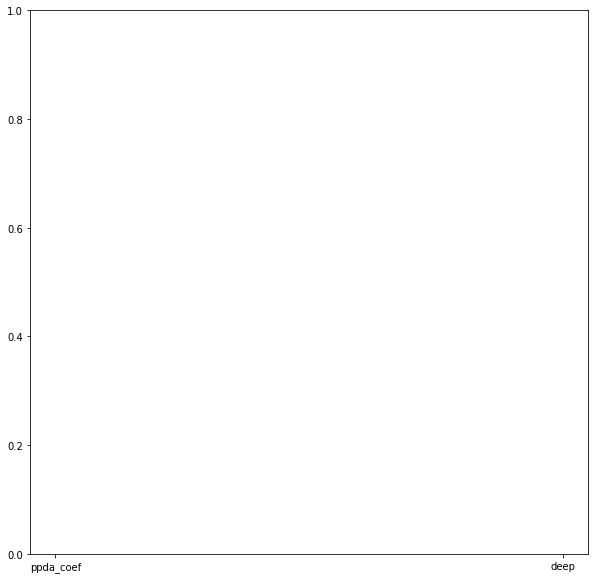

In [224]:
plt.figure(figsize = (10,10))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

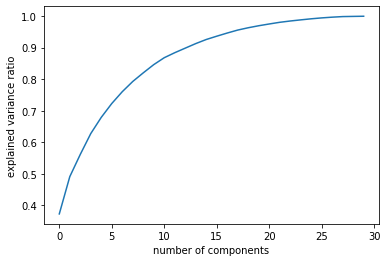

In [225]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [375]:
k_means = KMeans(n_clusters=3) 

# Run the clustering algorithm
k_means.fit(df_scaled2) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(df_scaled2) 


In [376]:
k_means.labels_

array([1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 2, 2], dtype=int32)

In [377]:
cluster_assignments

array([1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 2, 2], dtype=int32)

In [378]:
print(calinski_harabasz_score(df_scaled2, cluster_assignments))

22.115656218581105


In [379]:
df_labels = pd.DataFrame(cluster_assignments, columns=['cluster'], index=df_scaled2.index)

In [380]:
df_labels.head()

,cluster
Team,
Bayern Munich,1
Borussia Dortmund,1
RasenBallsport Leipzig,0
Bayer Leverkusen,1
Borussia M.Gladbach,1


In [381]:
df_labels[df_labels['cluster'] == 0]

,cluster
Team,
RasenBallsport Leipzig,0
Wolfsburg,0
Eintracht Frankfurt,0
Schalke 04,0
Everton,0
Leicester,0
Watford,0
Atletico Madrid,0
Getafe,0


In [391]:
df_scaled2.columns

Index(['ppda_coef', 'deep', 'CR', 'P', 'DR', 'IBS', 'OBS', 'TBOX', 'FKCR',
       'CRN', 'CRNCR', 'FKS', 'TOFF', 'BCS', 'oppda_coef', 'deep_allowed',
       'INT', 'BLK', 'TKL', 'FC', 'AW', 'BR', 'DW', 'AKS', 'CL', 'PUNCH',
       'LMT', 'poss'],
      dtype='object')

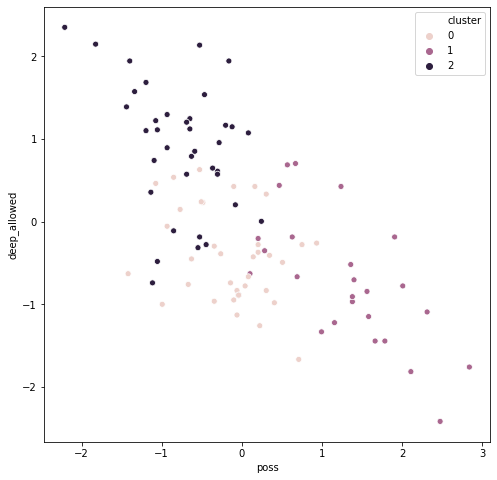

In [393]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_scaled2['poss'], y=df_scaled2['deep_allowed'], hue=df_labels['cluster'])

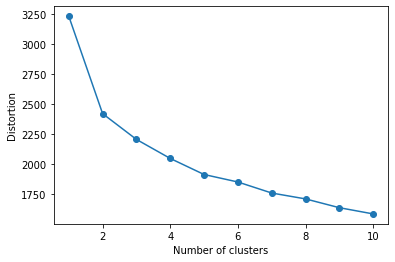

In [234]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [184]:
df_scaled.columns

Index(['xG', 'npxG', 'ppda_coef', 'deep', 'G', 'A', 'AOP', 'ASP', 'S', 'SOG',
       'CR', 'ACR', 'CC', 'BCC', 'CCOP', 'CCSP', 'FS', 'P', 'AP', 'ACRO', 'DR',
       'IBS', 'IBSOG', 'IBG', 'OBS', 'OBSOG', 'OBG', 'TOUCH', 'TBOX', 'PK',
       'PKG', 'PKM', 'PKSVD', 'FKCR', 'FKACR', 'CRN', 'CRNCR', 'CRNW', 'FKS',
       'FKSOG', 'FKG', 'ALB', 'ATB', 'TOFF', 'BCM', 'BCS', 'ATTDR', 'xGA',
       'npxGA', 'oppda_coef', 'deep_allowed', 'INT', 'BLK', 'TKL', 'TKLW',
       'FC', 'AW', 'BR', 'DW', 'DSP', 'OWN', 'GC', 'CS', 'SV', 'IBSV', 'OBSV',
       'AKS', 'PKC', 'PKF', 'PKSV', 'CL', 'ECL', 'PUNCH', 'LMT', 'poss'],
      dtype='object')

In [185]:
cols_2_drop5 = ['xG', 'npxG', 'xGA', 'npxGA', 'G', 'A', 'TKLW', 'BCC', 'CC', 'ACRO', 'AP', 'IBSOG', 'IBG', 'OBSOG', 
                'TOUCH', 'PKG', 'CRNW', 'FKSOG', 'IBSV', 'OBSV', 'CS', 'PKF', 'ECL', 'BCM', 'ATTDR', 'SOG', 
                'AOP', 'ASP', 'OBG', 'OWN', 'PKM', 'PKSVD', 'FKACR', 'FKG', 'GC', 'PKSV', 'ACR', 'FS', 'PK', 'DSP', 
                'SV', 'PKC']

In [186]:
df_scaled2 = df_scaled.drop(columns=cols_2_drop5)

In [278]:
df_scaled2.columns

Index(['ppda_coef', 'deep', 'S', 'CR', 'CCOP', 'CCSP', 'P', 'DR', 'IBS', 'OBS',
       'TBOX', 'FKCR', 'CRN', 'CRNCR', 'FKS', 'ALB', 'ATB', 'TOFF', 'BCS',
       'oppda_coef', 'deep_allowed', 'INT', 'BLK', 'TKL', 'FC', 'AW', 'BR',
       'DW', 'AKS', 'CL', 'PUNCH', 'LMT', 'poss'],
      dtype='object')

In [267]:
df_scaled2.to_csv(r'/Users/andrewtriola/Documents/flatiron/final_project/final_project_repo/df_scaled2.csv')

In [298]:
df_stats_poss3.to_csv(r'/Users/andrewtriola/Documents/flatiron/final_project/final_project_repo/df_stats_poss3.csv')

In [373]:
df_scaled2 = pd.read_csv('df_scaled2.csv', index_col='Team')

In [374]:
df_scaled2.head()

,ppda_coef,deep,CR,P,DR,IBS,OBS,TBOX,FKCR,CRN,...,TKL,FC,AW,BR,DW,AKS,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,-0.898850,2.973806,1.611378,2.370940,2.120765,3.188202,0.987291,3.397046,0.739975,3.731464,...,-2.081226,-1.795271,-0.716088,1.360479,-0.948188,0.407311,-3.083852,-1.680898,-0.596272,2.474804
Borussia Dortmund,1.390868,0.807589,-1.716195,1.854117,2.366656,0.630185,-0.790167,0.960062,0.388823,-0.090346,...,-1.469764,-2.115407,-1.202503,-0.403610,-0.713429,-1.157638,-0.662533,0.096810,-0.596272,1.379674
RasenBallsport Leipzig,-0.117029,0.509248,-0.068055,-0.233706,0.317571,1.470131,-0.663206,0.857572,0.827763,0.616207,...,1.420784,0.653768,1.188352,1.945090,1.814138,1.581023,-0.321502,-1.147586,0.708380,-0.100780
Bayer Leverkusen,-0.271538,1.067016,0.203158,1.991632,0.710995,1.412862,0.701628,1.227675,-0.664633,0.616207,...,0.401681,-0.866877,-0.386314,2.796366,0.084750,1.189786,-0.543172,-0.614273,-1.248599,1.562196
Borussia M.Gladbach,2.184874,0.405477,-0.600050,0.882059,-0.272566,0.343840,0.066822,0.174306,-0.576845,0.584091,...,-1.414177,-1.475135,-1.433344,-1.101041,-2.419341,-1.157638,-1.003564,-1.503127,0.056054,0.467065
